# Fast Food Marketing with A/B Testing

### About this Dataset
#### Scenario
A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

#### Goal    
Evaluate A/B testing results and decide which marketing strategy works the best.

#### Columns    
* MarketID: unique identifier for market    
* MarketSize: size of market area by sales    
* LocationID: unique identifier for store location    
* AgeOfStore: age of store in years      
* Promotion: one of three promotions that were tested    
* week: one of four weeks when the promotions were run    
* SalesInThousands: sales amount for a specific LocationID, Promotion, and week    

In [138]:
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter
from scipy.stats import ttest_1samp, shapiro, levene, f_oneway, kruskal

In [2]:
data = pd.read_csv('c:/data/Fast_Food_Marketing/WA_Marketing-Campaign.csv')

In [3]:
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


###### Data check

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [4]:
data.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [7]:
data.describeibe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


##### MarketID

In [5]:
data.MarketID.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [18]:
market_freq = Counter(data.MarketID)
market_freq

Counter({1: 52,
         2: 24,
         3: 88,
         4: 36,
         5: 60,
         6: 60,
         7: 60,
         8: 48,
         9: 40,
         10: 80})

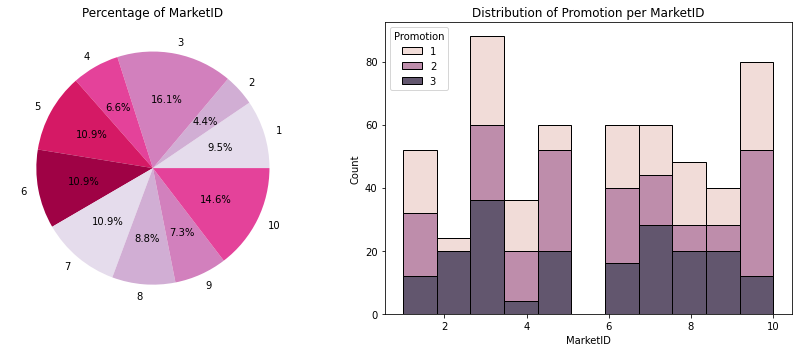

In [115]:
fig, axes = plt.subplots(ncols=2,figsize=(12,5))
colors = sns.color_palette('PuRd')
axes[0].pie(market_freq.values(),labels=market_freq.keys(),colors=colors,autopct='%.1f%%');
axes[0].set_title('Percentage of MarketID')
sns.histplot(ax=axes[1],x='MarketID',hue='Promotion',data=data,multiple='stack');
plt.title('Distribution of Promotion per MarketID');
plt.tight_layout();

##### 	MarketSize

In [36]:
data.MarketSize.unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [87]:
size_freq = Counter(data.MarketSize)

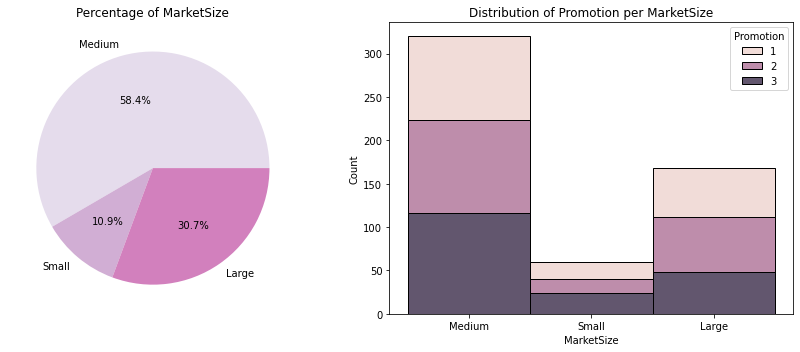

In [114]:
fig, axes = plt.subplots(ncols=2,figsize=(12,5))
colors = sns.color_palette('PuRd')
axes[0].pie(size_freq.values(),labels=size_freq.keys(),colors=colors,autopct='%.1f%%');
axes[0].set_title('Percentage of MarketSize')
sns.histplot(x='MarketSize',hue='Promotion',data=data,multiple='stack',ax=axes[1]);
plt.title('Distribution of Promotion per MarketSize');
plt.tight_layout();

##### LocationID

In [35]:
len(data.LocationID.unique())

137

In [93]:
Counter(data.LocationID)

Counter({1: 4,
         2: 4,
         3: 4,
         4: 4,
         5: 4,
         6: 4,
         7: 4,
         8: 4,
         9: 4,
         10: 4,
         11: 4,
         12: 4,
         13: 4,
         101: 4,
         102: 4,
         103: 4,
         104: 4,
         105: 4,
         106: 4,
         201: 4,
         202: 4,
         203: 4,
         204: 4,
         205: 4,
         206: 4,
         207: 4,
         208: 4,
         209: 4,
         210: 4,
         211: 4,
         212: 4,
         213: 4,
         214: 4,
         215: 4,
         216: 4,
         217: 4,
         218: 4,
         219: 4,
         220: 4,
         221: 4,
         222: 4,
         301: 4,
         302: 4,
         303: 4,
         304: 4,
         305: 4,
         306: 4,
         307: 4,
         308: 4,
         309: 4,
         401: 4,
         402: 4,
         403: 4,
         404: 4,
         405: 4,
         406: 4,
         407: 4,
         408: 4,
         409: 4,
         410: 4,
  

##### AgeOfStore

In [98]:
len(data.AgeOfStore.unique())

25

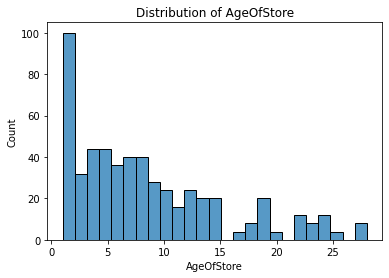

In [118]:
plt.figsize=(12,5)
plt.title('Distribution of AgeOfStore')
sns.histplot(data.AgeOfStore,bins=25);

#### Promotion

In [102]:
data.Promotion.unique()

array([3, 2, 1], dtype=int64)

In [103]:
Counter(data.Promotion)

Counter({3: 188, 2: 188, 1: 172})

##### week

In [121]:
data.week.unique()

array([1, 2, 3, 4], dtype=int64)

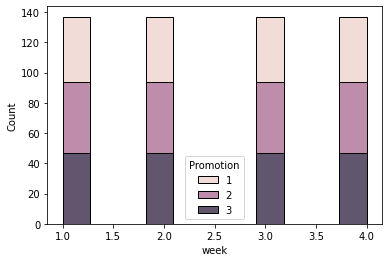

In [123]:
sns.histplot(x='week',hue='Promotion',data=data,multiple='stack');

#### Comparing SalesInThousands depending on variable

In [130]:
data.groupby('MarketSize').agg({'SalesInThousands':['count','mean','sum']})

SalesInThousands                     
                      count       mean       sum
MarketSize                                      
Large                   168  70.116726  11779.61
Medium                  320  43.985344  14075.31
Small                    60  57.409333   3444.56

In [133]:
data.groupby(['MarketSize','week']).agg({'SalesInThousands':['count','mean','sum']})

SalesInThousands                    
                           count       mean      sum
MarketSize week                                     
Large      1                  42  70.793333  2973.32
           2                  42  68.656667  2883.58
           3                  42  70.647381  2967.19
           4                  42  70.369524  2955.52
Medium     1                  80  44.403875  3552.31
           2                  80  44.378125  3550.25
           3                  80  44.107500  3528.60
           4                  80  43.051875  3444.15
Small      1                  15  56.245333   843.68
           2                  15  58.675333   880.13
           3                  15  55.348667   830.23
           4                  15  59.368000   890.52

In [135]:
data.groupby(['Promotion','week']).agg({'SalesInThousands':['count','mean','sum']})

SalesInThousands                    
                          count       mean      sum
Promotion week                                     
1         1                  43  58.244419  2504.51
          2                  43  56.929535  2447.97
          3                  43  58.774884  2527.32
          4                  43  58.447209  2513.23
2         1                  47  47.730213  2243.32
          2                  47  47.582553  2236.38
          3                  47  47.722128  2242.94
          4                  47  46.282766  2175.29
3         1                  47  55.776170  2621.48
          2                  47  55.949149  2629.61
          3                  47  54.377872  2555.76
          4                  47  55.354681  2601.67

In [137]:
data.groupby(['Promotion','MarketSize']).agg({'SalesInThousands':['count','mean','sum']})

SalesInThousands                    
                                count       mean      sum
Promotion MarketSize                                     
1         Large                    56  75.235893  4213.21
          Medium                   96  47.672604  4576.57
          Small                    20  60.162500  1203.25
2         Large                    64  60.322031  3860.61
          Medium                  108  39.114352  4224.35
          Small                    16  50.810625   812.97
3         Large                    48  77.203958  3705.79
          Medium                  116  45.468879  5274.39
          Small                    24  59.514167  1428.34

## A/B Testing (Just for SalesInThousands)

### Normality Assumption
H0: Normally Distributed    
H1: Not Normally Distributed

In [140]:
test_stat, pvalue = shapiro(data.loc[data["week"] == 1, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(data.loc[data["week"] == 2, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(data.loc[data["week"] == 3, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(data.loc[data["week"] == 4, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.8891, p-value = 0.0000
Test Stat = 0.9485, p-value = 0.0001
Test Stat = 0.9335, p-value = 0.0000
Test Stat = 0.9477, p-value = 0.0000


*we reject H0*

### ANOVA Testing
H0: M1 = M2 = M3 = M4    
H1: at least one group's mean are different

In [141]:
test_stat, pvalue = kruskal(data.loc[data["week"] == 1, "SalesInThousands"],
                                 data.loc[data["week"] == 2, "SalesInThousands"],
                                data.loc[data["week"] == 3, "SalesInThousands"],
                                data.loc[data["week"] == 4, "SalesInThousands"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0710, p-value = 0.9951


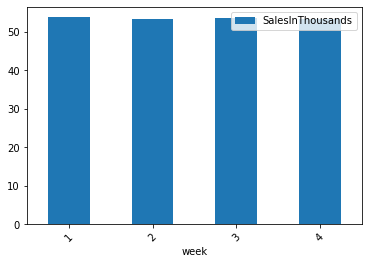

In [142]:
data.groupby(["week"]).agg({"SalesInThousands": "mean"}).plot(kind = "bar", rot = 45);

## A/B Testing (for SalesInThousands, Promotion, AgeOfStore)

In this section, I will create new variable which is called as "Score".It includes multiplication of these three variables.I want to consider impacts of these variables and compare with A/B Testing

In [143]:
data["Score"] = data["SalesInThousands"] * data["AgeOfStore"] * data["Promotion"]

### Normality Assumption
H0: Normally Distributed    
H1: Not Normally Distributed

In [144]:
test_stat, pvalue = shapiro(data.loc[data["week"] == 1, "Score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(data.loc[data["week"] == 2, "Score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(data.loc[data["week"] == 3, "Score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(data.loc[data["week"] == 4, "Score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.7759, p-value = 0.0000
Test Stat = 0.7797, p-value = 0.0000
Test Stat = 0.7768, p-value = 0.0000
Test Stat = 0.7720, p-value = 0.0000


*we reject H0*

### ANOVA Testing
H0: M1 = M2 = M3 = M4    
H1: at least one group's mean are different

In [146]:
test_stat, pvalue = kruskal(data.loc[data["week"] == 1, "Score"],
                                 data.loc[data["week"] == 2, "Score"],
                                data.loc[data["week"] == 3, "Score"],
                                data.loc[data["week"] == 4, "Score"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0176, p-value = 0.9994


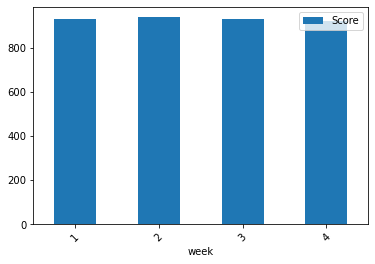

In [147]:
data.groupby(["week"]).agg({"Score": "mean"}).plot(kind = "bar", rot = 45);

## Final Note
As a result, there is no significant difference among weeks.So we can say that our new item is not more profitable than the other products.If we put the new product to our menu, there might not be big difference.We can try to develop different product.